In [1]:
import pandas as pd
from matplotlib import gridspec
from matplotlib.axes import Axes
import matplotlib.pyplot as plt

from utils import Coordinates, CleanedColumnNames
from lightcurve import LightCurve, BinnedLightCurve, Transient
from clean import LightCurveCleaner

MARKER_SIZE = 30
MARKER_EDGEWIDTH = 1.5

coords = Coordinates("186.44114","12.66357")
filt = "o"

# test cleaning

In [2]:
transient = Transient(filt=filt, verbose=True)

for i in range(0, 9):
    lc = LightCurve(i, coords, verbose=True)
    if i == 0:
        filename = f"/Users/sofiarest/Desktop/Supernovae/data_refactor/atclean_input/2023fyq/2023fyq.{filt}.lc.txt"
    else:
        filename = f"/Users/sofiarest/Desktop/Supernovae/data_refactor/atclean_input/2023fyq/controls/2023fyq_i{i:03d}.{filt}.lc.txt"
    print(i, filename)
    df = pd.read_table(filename, sep="\s+")
    lc.set(df)

    # transient.add(lc, deep=False)
    transient.lcs[lc.control_index] =lc

transient.preprocess()

0 /Users/sofiarest/Desktop/Supernovae/data_refactor/atclean_input/2023fyq/2023fyq.o.lc.txt
1 /Users/sofiarest/Desktop/Supernovae/data_refactor/atclean_input/2023fyq/controls/2023fyq_i001.o.lc.txt
2 /Users/sofiarest/Desktop/Supernovae/data_refactor/atclean_input/2023fyq/controls/2023fyq_i002.o.lc.txt
3 /Users/sofiarest/Desktop/Supernovae/data_refactor/atclean_input/2023fyq/controls/2023fyq_i003.o.lc.txt
4 /Users/sofiarest/Desktop/Supernovae/data_refactor/atclean_input/2023fyq/controls/2023fyq_i004.o.lc.txt
5 /Users/sofiarest/Desktop/Supernovae/data_refactor/atclean_input/2023fyq/controls/2023fyq_i005.o.lc.txt
6 /Users/sofiarest/Desktop/Supernovae/data_refactor/atclean_input/2023fyq/controls/2023fyq_i006.o.lc.txt
7 /Users/sofiarest/Desktop/Supernovae/data_refactor/atclean_input/2023fyq/controls/2023fyq_i007.o.lc.txt
8 /Users/sofiarest/Desktop/Supernovae/data_refactor/atclean_input/2023fyq/controls/2023fyq_i008.o.lc.txt
Deleting 0 rows with "duJy"==0 or "uJy"==NaN
Converting flux to magni

In [3]:
print(transient.num_controls)
print(transient.lc_indices)
print(transient.control_lc_indices)
print(transient.colnames)
print()
print(transient.get(2).t.head())
print(transient.get(2).colnames)

8
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8]
-- Required Columns --
mjd: MJD
ra: RA
dec: Dec
mag: m
dmag: dm
flux: uJy
dflux: duJy
filter: F
limiting_mag: mag5sig
-- Optional Columns --
chisquare: chi/N
snr: SNR

            MJD          m  dm   uJy  duJy  F  err  chi/N         RA      Dec  \
0  57205.272537  18.504094 NaN -66.0  48.0  o  0.0   1.09  186.44114  12.6683   
1  57205.273313  18.356290 NaN -94.0  55.0  o  0.0   1.43  186.44114  12.6683   
2  57205.281246  17.990970 NaN  63.0  56.0  o  0.0   0.92  186.44114  12.6683   
3  57205.281906  18.417189 NaN -10.0  52.0  o  0.0   1.59  186.44114  12.6683   
4  57206.277034  18.048890 NaN  69.0  50.0  o  0.0   1.17  186.44114  12.6683   

   ...        y   maj   min   phi  apfit  mag5sig    Sky             Obs Mask  \
0  ...  5145.00  3.98  3.69 -86.4 -0.431    18.28  19.15  02a57205o0017o    0   
1  ...  6115.26  4.03  3.46 -88.4 -0.414    18.32  19.24  02a57205o0018o    0   
2  ...  5144.12  3.95  3.63 -80.8 -0.425    18.

In [4]:
cleaner = LightCurveCleaner(verbose=True)

In [5]:
transient = cleaner.apply_UncertaintyCut(transient)
print(transient.get(0).get_percent_flagged(flag=0x2) *100)

3.9850560398505603


In [6]:
print(transient.get(0).t.dtypes)

MJD        float64
m          float64
dm         float64
uJy          int64
duJy         int64
F           object
err          int64
chi/N      float64
RA         float64
Dec        float64
x          float64
y          float64
maj        float64
min        float64
phi        float64
apfit      float64
mag5sig    float64
Sky        float64
Obs         object
Mask         int64
SNR        float64
dtype: object


(-2000.0, 15000.0)

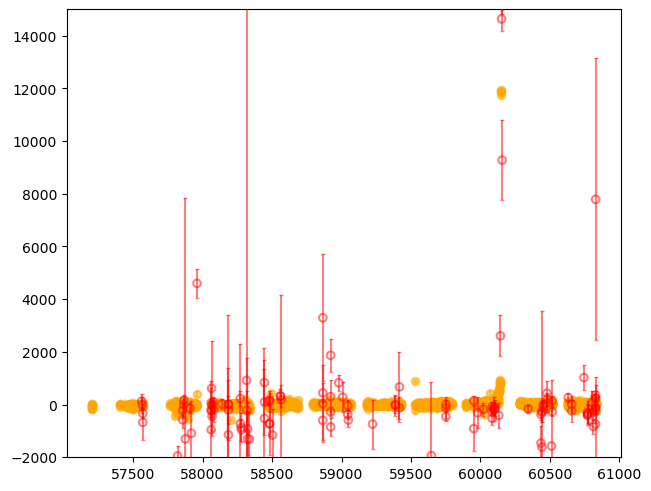

In [7]:
flag=0x2
color='orange'

fig, (ax) = plt.subplots(1, constrained_layout=True)

good_ix = transient.get(0).get_good_indices(flag)
bad_ix = transient.get(0).get_bad_indices(flag)

ax.errorbar(
    transient.get(0).t.loc[good_ix, transient.colnames.mjd],
    transient.get(0).t.loc[good_ix, transient.colnames.flux],
    yerr=transient.get(0).t.loc[good_ix, transient.colnames.dflux],
    fmt="none",
    ecolor=color,
    elinewidth=1.5,
    capsize=1.2,
    c=color,
    alpha=0.5,
    zorder=10,
)
ax.scatter(
    transient.get(0).t.loc[good_ix, transient.colnames.mjd],
    transient.get(0).t.loc[good_ix, transient.colnames.flux],
    s=MARKER_SIZE,
    lw=MARKER_EDGEWIDTH,
    color=color,
    marker="o",
    alpha=0.5,
    zorder=10,
    label='kept',
)

ax.errorbar(
    transient.get(0).t.loc[bad_ix, transient.colnames.mjd],
    transient.get(0).t.loc[bad_ix, transient.colnames.flux],
    yerr=transient.get(0).t.loc[bad_ix, transient.colnames.dflux],
    fmt="none",
    ecolor='red',
    elinewidth=1.5,
    capsize=1.2,
    c='red',
    alpha=0.5,
    zorder=10,
)
ax.scatter(
    transient.get(0).t.loc[bad_ix, transient.colnames.mjd],
    transient.get(0).t.loc[bad_ix, transient.colnames.flux],
    s=MARKER_SIZE,
    lw=MARKER_EDGEWIDTH,
    color='red',
    marker="o",
    alpha=0.5,
    zorder=10,
    label='kept',
    facecolors="none",
    edgecolors='red',
)

ax.set_ylim(-2000,15000)

In [8]:
#if "SNR" in transient.get(0).t.columns:transient.get(0).t.drop("SNR", axis=1,inplace=True)

# transient.get(0).t["Mask"] = transient.get(0).t["Mask"].apply(lambda x: f'0x0002' if x != 0 else f"0x0000")
# print(transient.get(0).t.to_string(index=False))

In [9]:
transient = cleaner.apply_UncertaintyCut(transient)
transient = cleaner.apply_UncertaintyEstimation(transient)
transient, stats_table = cleaner.apply_ChiSquareCut(transient)

print(transient.get(0).get_percent_flagged(flag=0x2) *100)
print(transient.get(0).t[transient.colnames.dflux_offset].head())
print(transient.get(0).get_percent_flagged(flag=0x1) *100)

We can increase the typical uncertainties from 23.50 to 30.50 by adding an additional systematic uncertainty of 19.44 in quadrature
New typical uncertainty is 29.79% greater than old typical uncertainty
Applying true uncertainties estimation
Replacing infs with NaNs
Calculating flux/dflux for 'SNR' column
Replacing infs with NaNs
Calculating flux/dflux for 'SNR' column
Replacing infs with NaNs
Calculating flux/dflux for 'SNR' column
Replacing infs with NaNs
Calculating flux/dflux for 'SNR' column
Replacing infs with NaNs
Calculating flux/dflux for 'SNR' column
Replacing infs with NaNs
Calculating flux/dflux for 'SNR' column
Replacing infs with NaNs
Calculating flux/dflux for 'SNR' column
Replacing infs with NaNs
Calculating flux/dflux for 'SNR' column
Replacing infs with NaNs
Calculating flux/dflux for 'SNR' column
Success
The extra noise was added to the uncertainties of the SN light curve and copied to the "duJy_new" column
Calculating loss and contamination for chi-square cuts from 

In [10]:
from utils import StatParams


s = StatParams()
print(s.mean)

None


In [11]:
previous_flags = 0x1 | 0x2

# transient.calculate_control_stats(previous_flags)
# transient.flag_by_control_stats()

transient = cleaner.apply_ControlLightCurveCut(transient, previous_flags)

Calculating control light curve statistics
Success


In [12]:
transient.get(0).t.columns

Index(['MJD', 'm', 'dm', 'uJy', 'duJy', 'F', 'err', 'chi/N', 'RA', 'Dec', 'x',
       'y', 'maj', 'min', 'phi', 'apfit', 'mag5sig', 'Sky', 'Obs', 'Mask',
       'SNR', 'dflux_offset_in_quadrature', 'controls_mean',
       'controls_mean_err', 'controls_stdev', 'controls_stdev_err',
       'controls_X2norm', 'controls_Nclip', 'controls_Ngood',
       'controls_Nchanged', 'controls_Nmask', 'controls_Nnan',
       'controls_abs_stn'],
      dtype='object')

In [13]:
if "SNR" in transient.get(0).t.columns:
    transient.get(0).t.drop("SNR", axis=1,inplace=True)
if "controls_Nchanged" in transient.get(0).t.columns:
    transient.get(0).t.drop("controls_Nchanged", axis=1,inplace=True)

if transient.colnames.dflux_offset in transient.get(0).t.columns:
    transient.get(0).t.drop(transient.colnames.dflux_offset, axis=1,inplace=True)

# transient.get(0).t["Mask"] = transient.get(0).t["Mask"].apply(lambda x:hex(x) if x != 0 else f"0x0000")
for col in ['controls_Nclip',  'controls_Ngood',  'controls_Nchanged',  'controls_Nmask' , 'controls_Nnan']:
    if col in transient.get(0).t.columns:transient.get(0).t[col] = transient.get(0).t[col].astype(int)

cols = transient.get(0).t.columns.tolist()
i, j = cols.index('controls_Nclip'), cols.index('controls_Ngood')
cols[i], cols[j] = cols[j], cols[i]
transient.get(0).t = transient.get(0).t[cols]

print(transient.get(0).t.iloc[[205,206]].to_string())#.to_string(index=False))

              MJD          m  dm   uJy        duJy  F  err  chi/N         RA       Dec        x        y   maj   min   phi  apfit  mag5sig    Sky             Obs     Mask  controls_mean  controls_mean_err  controls_stdev  controls_stdev_err  controls_X2norm  controls_Ngood  controls_Nclip  controls_Nmask  controls_Nnan  controls_abs_stn
205  57893.354393  17.281543 NaN -2540  149.271843  o    0  10.14  186.44114  12.66357  2855.46  4678.42  5.43  4.63  74.0 -0.367    18.92  20.91  01a57893o0229o  4196609           79.5         132.930792     3322.464744         1661.232372       398.504911               0               2               6              0          0.598056
206  57893.371307  18.675237 NaN  -539   45.377121  o    0   7.47  186.44114  12.66357  2849.53  4860.33  5.72  4.68  76.5 -0.334    18.78  20.78  01a57893o0263o  4197632          -47.5          21.551022      989.755463          285.717791       225.754726               0               6               2              0  

In [14]:
print(hex(4196609), hex(4197632))
print(hex(4196353), hex(4197376))
print(hex(4196353|0x100),hex(4197376|0x100))

0x400901 0x400d00
0x400801 0x400c00
0x400901 0x400d00


In [15]:
transient.get(0).t.at[205,"Mask"] &= ~0x100
transient.get(0).t.at[206,"Mask"] &= ~0x100

In [16]:
print(cleaner.cut_history)

print()
print(transient.get(0).get_percent_flagged(flag=0x100) *100)
print(transient.get(0).get_percent_flagged(flag=0x200) *100)
print(transient.get(0).get_percent_flagged(flag=0x400) *100)
print(transient.get(0).get_percent_flagged(flag=0x800) *100)
print(transient.get(0).get_percent_flagged(flag=0x80000) *100)
print(transient.get(0).get_percent_flagged(flag=0x400000) *100)

-- Cut History --
Uncertainty Cut
- 'high_uncertainty' primary flag (0x2): measurement has an uncertainty above 160
True Uncertainties Estimation: We attempt to account for an extra noise source in the data by estimating the true typical uncertainty, deriving the additional systematic uncertainty, and applying this extra noise to the uncertainty column. We also use a temporary, very high PSF chi-square cut value of 20 to eliminate the most egregious outliers from the data before estimating the true uncertainties.
PSF Chi-Square Cut
- 'high_psf_chi_square' primary flag (0x1): measurement has a PSF chi-square above 10
Control Light Curve Cut: For a given SN epoch, we can calculate the 3sigma-clipped average of the corresponding N control flux measurements falling within the same epoch. Given the expectation of control flux consistency with zero, the statistical properties accompanying the 3sigma-clipped average enable us to identify problematic epochs.
- 'bad_epoch' primary flag (0x40000

In [18]:
previous_flags = previous_flags | 0x400000
transient, binned_transient = cleaner.apply_BadDayCut(transient, previous_flags)

Now averaging SN light curve
Now averaging control light curve 1
Now averaging control light curve 2
Now averaging control light curve 3
Now averaging control light curve 4
Now averaging control light curve 5
Now averaging control light curve 6
Now averaging control light curve 7
Now averaging control light curve 8


In [19]:
df = binned_transient.get(0).t.copy()
df["Mask"] = df["Mask"].apply(lambda x: hex(x) if x != 0 else f"0x0000")
print(df.head())
df.to_string("test.txt", index=False)

print(cleaner.cut_history)
print(transient.get(0).get_percent_flagged(flag=0x800000) *100)
print(binned_transient.get(0).get_percent_flagged(flag=0x800000) *100)

    MJDbin  Nclip  Ngood  Nexcluded      Mask          MJD       flux  \
0  57205.5      0      4          0    0x0000  57205.27725 -54.362651   
1  57206.5      0      5          1    0x0000  57206.28422 -57.309750   
2  57207.5      0      0          0  0x800000          NaN        NaN   
3  57208.5      0      0          0  0x800000          NaN        NaN   
4  57209.5      0      0          0  0x800000          NaN        NaN   

       dflux      stdev    X2norm          m  dm  
0  27.994392  69.680222  1.346859  19.089519 NaN  
1  23.793532  66.266885  1.626559  19.266050 NaN  
2        NaN        NaN       NaN        NaN NaN  
3        NaN        NaN       NaN        NaN NaN  
4        NaN        NaN       NaN        NaN NaN  
-- Cut History --
Uncertainty Cut
- 'high_uncertainty' primary flag (0x2): measurement has an uncertainty above 160
True Uncertainties Estimation: We attempt to account for an extra noise source in the data by estimating the true typical uncertainty, deri

In [ ]:
lc = transient.get(0)

non_null_ix = lc.ix_not_null(lc.colnames.mjd)
bad_ix = lc.ix_masked(lc.colnames.mask, maskval=flag, indices=non_null_ix)
print(len(lc.t))
print(len(non_null_ix))
print(len(bad_ix))

# test binning

In [ ]:
lc = LightCurve(0, coords, verbose=True)
df = pd.read_table("/Users/sofiarest/Desktop/Supernovae/data_refactor/output/misc/2023fyq/2023fyq.o.clean.lc.txt", sep="\s+")
lc.set(df)
lc.t[lc.colnames.mask] = lc.t[lc.colnames.mask].apply(
    lambda x: int(x, 16) if isinstance(x, str) and x.startswith("0x") else int(x)
)

In [ ]:
print(lc.colnames.__str__())
lc.t.head()

In [ ]:
previous_flags = 0x1|0x2|0x400000
binned_lc = lc.get_BinnedLightCurve(previous_flags)

In [ ]:
df = binned_lc.t.copy()
df["Mask"] = df["Mask"].apply(lambda x: hex(x) if x != 0 else f"0x0000")
print(df.head())
df.to_string("test.txt", index=False)